In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
data = pd.read_csv("Network_processed_data.csv")
for i in range (10):
    data = shuffle(data)
#將資料空格刪除
# data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# #創建 LabelEncoder 物件
# label_encoder = LabelEncoder()
# #labeling
# data['service'] = data['service'].map({"-":0,})
# data['dns_query'] = data['dns_query'].map({"-":0,})
# data['dns_AA'] = data['dns_AA'].map({"-":0,})
# data['dns_RD'] = data['dns_RD'].map({"-":0})
# data['dns_RA'] = data['dns_RA'].map({"-":0,})
# data['dns_rejected'] = data['dns_rejected'].map({"-":0,})
# data['ssl_version'] = data['ssl_version'].map({"-":0,})
# data['ssl_cipher'] = data['ssl_cipher'].map({"-":0,})
# data['ssl_resumed'] = data['ssl_resumed'].map({"-":0,})
# data['ssl_established'] = data['ssl_established'].map({"-":0,})
# data['ssl_subject'] = data['ssl_subject'].map({"-":0,})
# data['ssl_issuer'] = data['ssl_issuer'].map({"-":0,})
# data['http_trans_depth'] = data['http_trans_depth'].map({"-":0,})
# data['http_method'] = data['http_method'].map({"-":0,})
# data['http_uri'] = data['http_uri'].map({"-":0,})
# data['http_version'] = data['http_version'].map({"-":0,})
# data['http_orig_mime_types'] = data['http_orig_mime_types'].map({"-":0,})
# data['http_resp_mime_types'] = data['http_resp_mime_types'].map({"-":0,})
# data['weird_name'] = data['weird_name'].map({"-":0,})
# data['weird_addl'] = data['weird_addl'].map({"-":0,})
# data['weird_notice'] = data['weird_notice'].map({"-":0,})
# data['weird_name'] = data['weird_name'].map({"-":0,})
# # 將目標變量進行編碼（如果是字串形式）
# data['ts'] = label_encoder.fit_transform(data['ts'])
# data['src_ip'] = label_encoder.fit_transform(data['src_ip'])
# data['src_port'] = label_encoder.fit_transform(data['src_port'])
# data['dst_ip'] = label_encoder.fit_transform(data['dst_ip'])
# data['dst_port'] = label_encoder.fit_transform(data['dst_port'])
# data['proto'] = label_encoder.fit_transform(data['proto'])
# data['service'] = label_encoder.fit_transform(data['service'])
# data['duration'] = label_encoder.fit_transform(data['duration'])
# data['src_bytes'] = label_encoder.fit_transform(data['src_bytes'])
# data['dst_bytes'] = label_encoder.fit_transform(data['dst_bytes'])
# data['conn_state'] = label_encoder.fit_transform(data['conn_state']) 
# data['missed_bytes'] = label_encoder.fit_transform(data['missed_bytes'])
# data['src_pkts'] = label_encoder.fit_transform(data['src_pkts'])
# data['src_ip_bytes'] = label_encoder.fit_transform(data['src_ip_bytes'])
# data['dst_pkts'] = label_encoder.fit_transform(data['dst_pkts'])
# data['dst_ip_bytes'] = label_encoder.fit_transform(data['dst_ip_bytes'])
# data['dns_query'] = label_encoder.fit_transform(data['dns_query'])
# data['dns_qclass'] = label_encoder.fit_transform(data['dns_qclass'])
# data['dns_qtype'] = label_encoder.fit_transform(data['dns_qtype'])
# data['dns_rcode'] = label_encoder.fit_transform(data['dns_rcode'])
# data['dns_AA'] = label_encoder.fit_transform(data['dns_AA'])
# data['dns_RD'] = label_encoder.fit_transform(data['dns_RD'])
# data['dns_RA'] = label_encoder.fit_transform(data['dns_RA'])
# data['dns_rejected'] = label_encoder.fit_transform(data['dns_rejected'])
# data['ssl_version'] = label_encoder.fit_transform(data['ssl_version'])
# data['ssl_cipher'] = label_encoder.fit_transform(data['ssl_cipher'])
# data['ssl_resumed'] = label_encoder.fit_transform(data['ssl_resumed'])
# data['ssl_established'] = label_encoder.fit_transform(data['ssl_established'])
# data['ssl_subject'] = label_encoder.fit_transform(data['ssl_subject'])
# data['ssl_issuer'] = label_encoder.fit_transform(data['ssl_issuer'])
# data['http_trans_depth'] = label_encoder.fit_transform(data['http_trans_depth'])
# data['http_method'] = label_encoder.fit_transform(data['http_method'])
# data['http_uri'] = label_encoder.fit_transform(data['http_uri'])
# data['http_version'] = label_encoder.fit_transform(data['http_version'])
# data['http_request_body_len'] = label_encoder.fit_transform(data['http_request_body_len'])
# data['http_response_body_len'] = label_encoder.fit_transform(data['http_response_body_len'])
# data['http_response_body_len'] = label_encoder.fit_transform(data['http_response_body_len'])
# data['http_status_code'] = label_encoder.fit_transform(data['http_status_code'])
# data['http_user_agent'] = label_encoder.fit_transform(data['http_user_agent'])
# data['http_orig_mime_types'] = label_encoder.fit_transform(data['http_orig_mime_types'])
# data['http_resp_mime_types'] = label_encoder.fit_transform(data['http_resp_mime_types'])
# data['weird_name'] = label_encoder.fit_transform(data['weird_name'])
# data['weird_addl'] = label_encoder.fit_transform(data['weird_addl'])
# data['weird_notice'] = label_encoder.fit_transform(data['weird_notice'])
# data['label'] = label_encoder.fit_transform(data['label'])
# data['type'] = data['type'].map({"backdoor":0,"ddos":1,"dos":2,"injection":3,"mitm":4,"normal":5,"password":6,"ransomware":7,"scanning":8,"xss":9})

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head(10)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,...,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type_backdoor,type_ddos,type_dos,type_injection,type_mitm,type_normal,type_password,type_ransomware,type_scanning,type_xss
337077,90231,4595,49512,1575,51,2,1,20357,33,741,10,0,1,26,1,740,1,1,9,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
117507,57887,4590,42185,1511,910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
71288,38009,4614,28790,1522,938,2,0,0,0,0,6,0,1,22,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
358633,98279,4604,37497,4372,78,1,0,0,0,0,11,0,1,11,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True
411273,109551,4590,3068,3839,651,2,1,0,0,0,6,0,1,26,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
185728,74971,4602,73,1518,76,1,0,14,0,0,1,0,1,2,1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,False,False,False,False,False,False,False
15579,11635,4590,22706,1511,910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
437887,110504,4605,30829,1518,142,1,0,0,0,0,0,0,0,0,1,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,True,False,False
190580,75183,4603,42047,3813,102,2,0,28089,42,29,10,0,1,35,1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,True,False,False,False,False,False,False
328753,87519,4595,45567,1608,51,2,1,9988,37,745,10,0,1,30,1,744,1,1,9,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False


In [45]:

#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]
train_data = data.values
test_data = data.values

#前44列的資料進行訓練
X_train = train_data[:,0:44]
X_train =X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,44:]
Y_train =Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:44]
X_test=X_test.astype(float)
#第5列之後為訓練目標變量
Y_test = test_data[:,44:]
Y_test =Y_test.astype(float)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("=============")
print(X_train.dtype)
print(Y_test.dtype)

(461043, 44)
(461043, 10)
(461043, 44)
(461043, 10)
float64
float64


## RandomForest建置

In [42]:
randomForestModel = RandomForestRegressor(n_estimators=100,criterion = 'squared_error')
randomForestModel.fit(X_train, Y_train)
predicted = randomForestModel.predict(X_train)

## 預測成功的比例

In [46]:
print('accuracy: ',randomForestModel.score(X_test,Y_test))

accuracy:  0.9999944431299859


## KFold驗證

In [ ]:
# accuracy = cross_val_score(randomForestModel, X_test, Y_test, cv=5, scoring="accuracy")
# print(accuracy)
# print(accuracy.mean()*100,'%')屁眼

## 輸出混淆矩陣

In [8]:
Y_pred = predicted

Y_pred = np.argmax(Y_pred, axis=1).astype(int)
Y_test_2 = np.argmax(Y_test, axis=1).astype(int)

from sklearn.metrics import multilabel_confusion_matrix

#row=Y_test_2 col=Y_pred
cm=confusion_matrix(Y_test_2,Y_pred)
print(cm)

[[ 20000      0      0      0      0      0      0      0      0      0]
 [     0  20000      0      0      0      0      0      0      0      0]
 [     0      0  20000      0      0      0      0      0      0      0]
 [     0      0      0  20000      0      0      0      0      0      0]
 [     0      0      0      0   1043      0      0      0      0      0]
 [     0      0      0      0      0 300000      0      0      0      0]
 [     0      0      0      0      0      0  20000      0      0      0]
 [     0      0      0      0      0      0      0  20000      0      0]
 [     0      0      0      0      0      0      0      0  20000      0]
 [     0      0      0      0      0      0      0      0      0  20000]]


## 繪製熱力圖

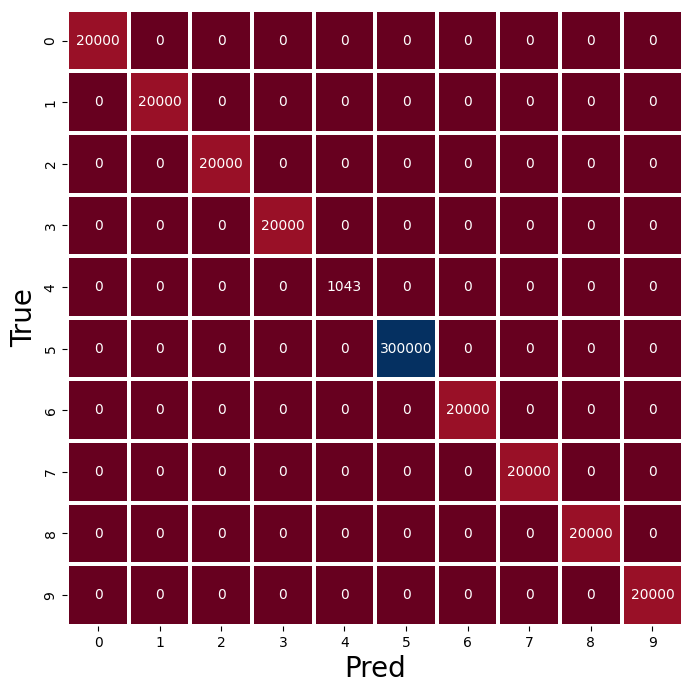

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()